<a href="https://colab.research.google.com/github/anisha-d08/image_classification/blob/main/Image_Classification_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread

In [ ]:
# Gather data
# Downloaded images from Flickr Image-Scraper

In [14]:
# Preprocessing

DATADIR = '/content/drive/MyDrive/DS-Mini-Project/Images'
CATEGORIES = ['Cup', 'Rose', 'Spoon']

Target = []
Image = []
Flat_data = []

for category in CATEGORIES:
  class_t = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_arr = imread(os.path.join(path,img))
    img_resized = resize(img_arr,(150,150,3))
    Flat_data.append(img_resized.flatten())
    Image.append(img_resized)
    Target.append(class_t)

Flat_data = np.array(Flat_data)
Image = np.array(Image)
Target = np.array(Target)

In [15]:
df = pd.DataFrame(Flat_data)
df['Target'] = Target
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,67461,67462,67463,67464,67465,67466,67467,67468,67469,67470,67471,67472,67473,67474,67475,67476,67477,67478,67479,67480,67481,67482,67483,67484,67485,67486,67487,67488,67489,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.521569,0.474510,0.411765,0.529412,0.474510,0.419608,0.517647,0.470588,0.419608,0.505882,0.458824,0.415686,0.501961,0.458824,0.413412,0.501961,0.454902,0.411765,0.494118,0.450980,0.407843,0.490196,0.450980,0.403922,0.490196,0.450980,0.403922,0.490196,0.454902,0.407843,0.494118,0.450980,0.407843,0.494118,0.454902,0.411765,0.498039,0.454902,0.407843,0.498039,...,0.490196,0.439216,0.368627,0.494118,0.447059,0.368627,0.486275,0.439216,0.360784,0.482353,0.435294,0.356863,0.482353,0.435294,0.360784,0.482353,0.435294,0.360784,0.486275,0.443137,0.366353,0.482913,0.439216,0.360784,0.478431,0.431373,0.356863,0.474510,0.427451,0.360784,0.474510,0.431373,0.356863,0.478431,0.431373,0.360784,0.474510,0.427451,0.360784,0
1,0.003922,0.000000,0.000000,0.003922,0.000000,0.000000,0.003922,0.000000,0.000000,0.003922,0.000000,0.000000,0.003922,0.000000,0.000000,0.003922,0.000000,0.000000,0.003922,0.000000,0.000000,0.003922,0.000000,0.000000,0.011765,0.003922,0.000000,0.027451,0.003922,0.000000,0.035294,0.007843,0.000000,0.024549,0.007843,0.000000,0.015686,0.011765,0.003922,0.015686,...,0.054902,0.050980,0.043137,0.058824,0.054902,0.047059,0.061360,0.058745,0.050980,0.054902,0.050980,0.047059,0.058824,0.054902,0.047059,0.054902,0.050980,0.047059,0.054902,0.050980,0.047059,0.054902,0.054902,0.047059,0.054902,0.054902,0.047059,0.050980,0.048767,0.043137,0.047059,0.045725,0.039216,0.043137,0.039216,0.035294,0.035294,0.035294,0.031373,0
2,0.817362,0.847595,0.871464,0.835150,0.863621,0.889404,0.853699,0.877608,0.900641,0.877765,0.891603,0.906758,0.797438,0.829673,0.846235,0.643974,0.686928,0.710600,0.562300,0.587477,0.617588,0.583936,0.614132,0.641621,0.654553,0.689386,0.720344,0.731159,0.759176,0.802314,0.778628,0.810719,0.849935,0.795203,0.834424,0.869718,0.792810,0.832026,0.867320,0.627307,...,0.866667,0.819608,0.772549,0.866641,0.815686,0.772549,0.866667,0.818902,0.772549,0.866667,0.823529,0.776471,0.870588,0.823529,0.776471,0.870325,0.823529,0.776471,0.867052,0.827451,0.780392,0.874510,0.823529,0.780392,0.874510,0.823529,0.777333,0.870588,0.823529,0.780392,0.866667,0.817412,0.778693,0.866667,0.815686,0.768627,0.866667,0.815686,0.776471,0
3,0.442601,0.302301,0.152141,0.431373,0.282353,0.145098,0.419608,0.274510,0.152941,0.403922,0.266667,0.149020,0.395216,0.254039,0.136392,0.384314,0.235294,0.122404,0.377346,0.235294,0.121569,0.391856,0.239216,0.117647,0.404383,0.243599,0.118108,0.420793,0.256087,0.126366,0.433124,0.276261,0.138288,0.456680,0.291974,0.149895,0.479529,0.315477,0.161882,0.507176,...,0.738638,0.615686,0.514601,0.741176,0.619582,0.517647,0.740458,0.623529,0.525490,0.737255,0.623529,0.521569,0.741176,0.623529,0.525490,0.741176,0.623529,0.525490,0.745098,0.631373,0.529412,0.748144,0.635294,0.537255,0.744415,0.634418,0.540301,0.749020,0.635294,0.537255,0.759058,0.639216,0.542052,0.756863,0.635294,0.541176,0.764706,0.643137,0.541176,0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.994745,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,.

In [16]:
# Split the Data into Train and Test Values
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(Flat_data, Target, test_size = 0.3,random_state=8)

In [23]:
# Applying SVM with GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C' : [1,10,100,1000], 'kernel' : ['linear']},
              {'C' : [1,10,100,1000], 'gamma' : [0.001, 0.0001, 0.00001],'kernel': ['rbf']}
]

svc = svm.SVC(probability = True)
clf = GridSearchCV(svc, param_grid)
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.001, 0.0001, 1e-05], 'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [24]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 2, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 1,
       0, 0])

In [25]:
y_test

array([0, 1, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1,
       0, 2])

In [26]:
# Evaluating the model

from sklearn.metrics import accuracy_score, confusion_matrix

In [27]:
accuracy_score(y_pred, y_test)

0.7083333333333334

In [28]:
confusion_matrix(y_pred, y_test)

array([[5, 0, 4],
       [1, 7, 0],
       [1, 1, 5]])

In [29]:
# Store the model

import pickle 
pickle.dump(clf, open('image_model.p', 'wb'))

In [30]:
model = pickle.load(open('image_model.p', 'rb'))

Enter image URL > https://www.maybach-luxury.com/wp-content/uploads/2018/03/MMA_Gemueseloeffel.jpg
(1200, 1200, 3)
PREDICTED OUTPUT : Spoon


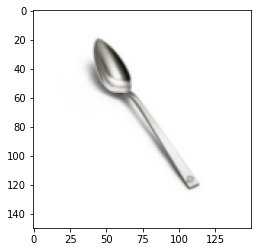

In [35]:
# Testing the model with new data

f_data = []
url = input('Enter image URL > ')
img = imread(url)
img_resized = resize(img, (150,150,3))
f_data.append(img_resized.flatten())
f_data = np.array(f_data)

print(img.shape)
plt.imshow(img_resized)

y_out = model.predict(f_data)
y_out = CATEGORIES[y_out[0]]

print(f'PREDICTED OUTPUT : {y_out}')